<a href="https://colab.research.google.com/github/Emma-Ok/Phishing-Detection-ML/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pishing For Machine Learning.

LogisticRegression

*Proyecto para la asignatura Modelos y Simulación 2.*
<br>

*Universidad de Antioquia*

In [68]:
# Imports y carga de datos
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Carga directa desde GitHub
url = "https://raw.githubusercontent.com/Emma-Ok/Phishing-Detection-ML/main/Phishing_Legitimate_full.csv"
df = pd.read_csv(url)
df = df.drop(columns=['id'])

# Separar X e y
X = df.drop(columns=['CLASS_LABEL'])
y = df['CLASS_LABEL']

# División en train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)

# Definición de pipeline
pipe = Pipeline([
    ( 'StandardScaler',StandardScaler()), # 'binarizer', Binarizer(),
    ('clf', LogisticRegression(random_state=42, solver='liblinear' ))
])

# Grid de hiperparámetros
param_grid = {
    'clf__C': [0.01, 0.1, 1,10],    # Inversa de fuerza de regularización
    'clf__penalty': ['l2'],         # L1 para sparsity, L2 para estabilidad
}

grid = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Entrenamiento y búsqueda de mejores parámetros
grid.fit(X_train, y_train)

print("Mejores parámetros encontrados:", grid.best_params_)
print(f"Mejor AUC en CV: {grid.best_score_:.4f}")

# Evaluación en test
best_model = grid.best_estimator_

y_pred  = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]
confusion_matrix(y_test, y_pred)

print("\n--- Classification Report (test) ---")
print(classification_report(y_test, y_pred))
print("ROC AUC (test):", roc_auc_score(y_test, y_proba))


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Mejores parámetros encontrados: {'clf__C': 1, 'clf__penalty': 'l2'}
Mejor AUC en CV: 0.9848

--- Classification Report (test) ---
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       988
           1       0.93      0.95      0.94      1012

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

ROC AUC (test): 0.9824264694115953


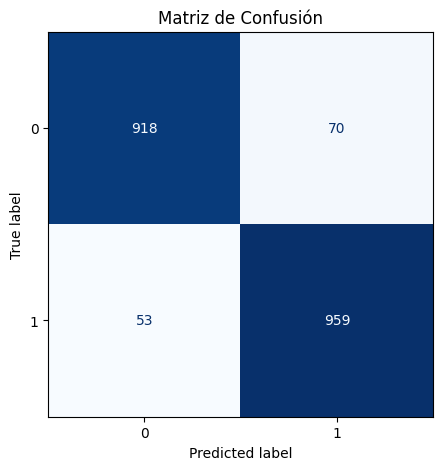

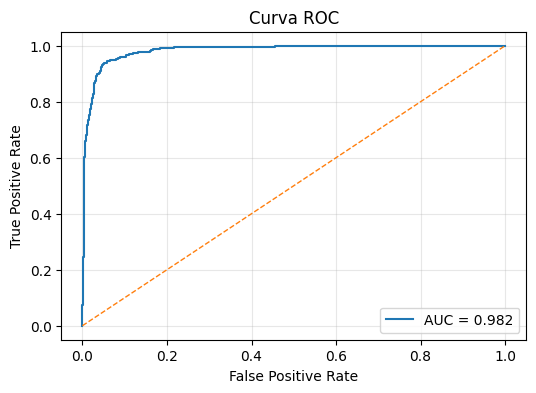

In [72]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

#Use the best estimator
best_model = grid.best_estimator_

#Predics about X_test
y_pred  = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# 3) Confusion Matrix graphic.
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_model.classes_)

fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
plt.title("Matriz de Confusión")
plt.show()

# 4) Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1],'--', linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()
